In [1]:
#basic
import numpy as np
import pandas as pd
import pickle
from scipy.stats import norm

#ploting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#model
from sklearn.model_selection import train_test_split

#irgenore warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

### Import data, have a overview and delete 'B' ### 

In [2]:
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','GE','DIS','RAD','TAX','PRTATIO','B','LSTAT','PRICE']     # len(names)= 14
boston=pd.read_csv("../data/housing-Sheet1.csv", names= names, delim_whitespace=True)     # original data resouce: http://lib.stat.cmu.edu/datasets/boston
boston= boston.drop('B', axis=1)     # drop Black Columm with new shape (506, 13)
boston.to_csv("../data/housing_modified.csv", index=False, header=True)  # save the modified data to a new CSV file
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM    GE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PRTATIO  LSTAT  PRICE  
0     15.3   4.98   24.0  
1     17.8   9.14   21.6  
2     17.8   4.03   34.7  
3     18.7   2.94   33.4  
4     18.7   5.33   36.2  


In [3]:
boston.describe()
#CRIM犯罪率                      #ZN住宅用地所占比例                  #INDUS城镇中非住宅用地所占比例
#CHAS是否穿过查尔斯河              #NOX氮氧化污染物                    #RM每栋住宅的房间数
#GE1940年以前建成的自住单位的比例   #DIS距离5个波士顿的就业中心的加权距离   #RAD距离高速公路的便利指数
#TAX每一万美元的不动产税率         #PRTATIO城镇中的教师学生比例          #B城镇中的黑人比例
#LSTAT低收入群比例

#PRICE价格

,CRIM,ZN,INDUS,CHAS,NOX,RM,GE,DIS,RAD,TAX,PRTATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


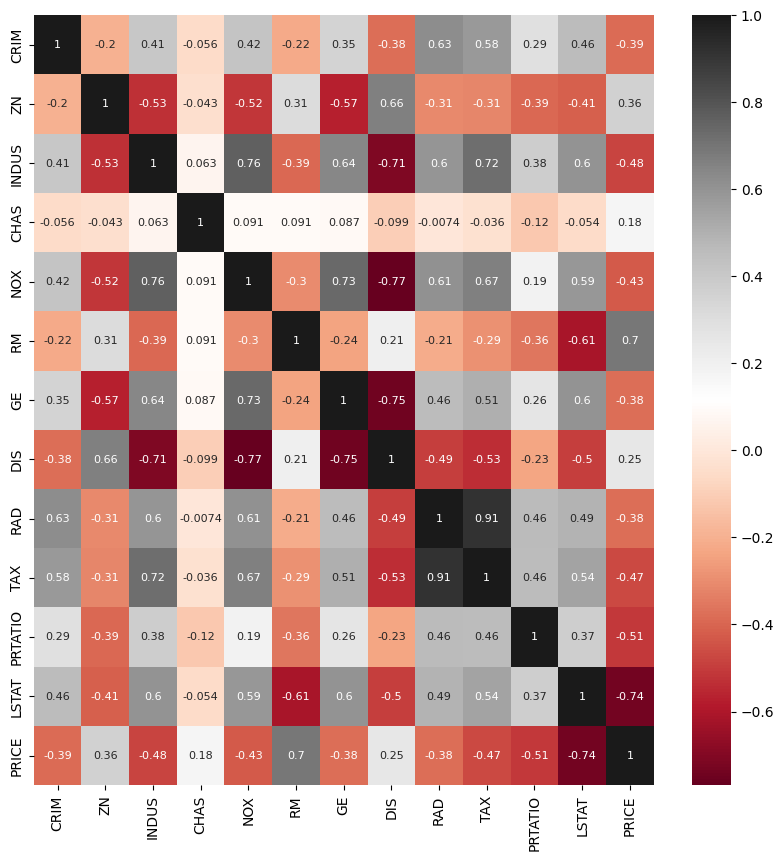

In [4]:
# Check data correlations
corrboston = boston.corr()
plt.figure(figsize=(10,10))    
sns.heatmap(corrboston, annot=True, cmap='RdGy', annot_kws={"size": 8})
plt.show()

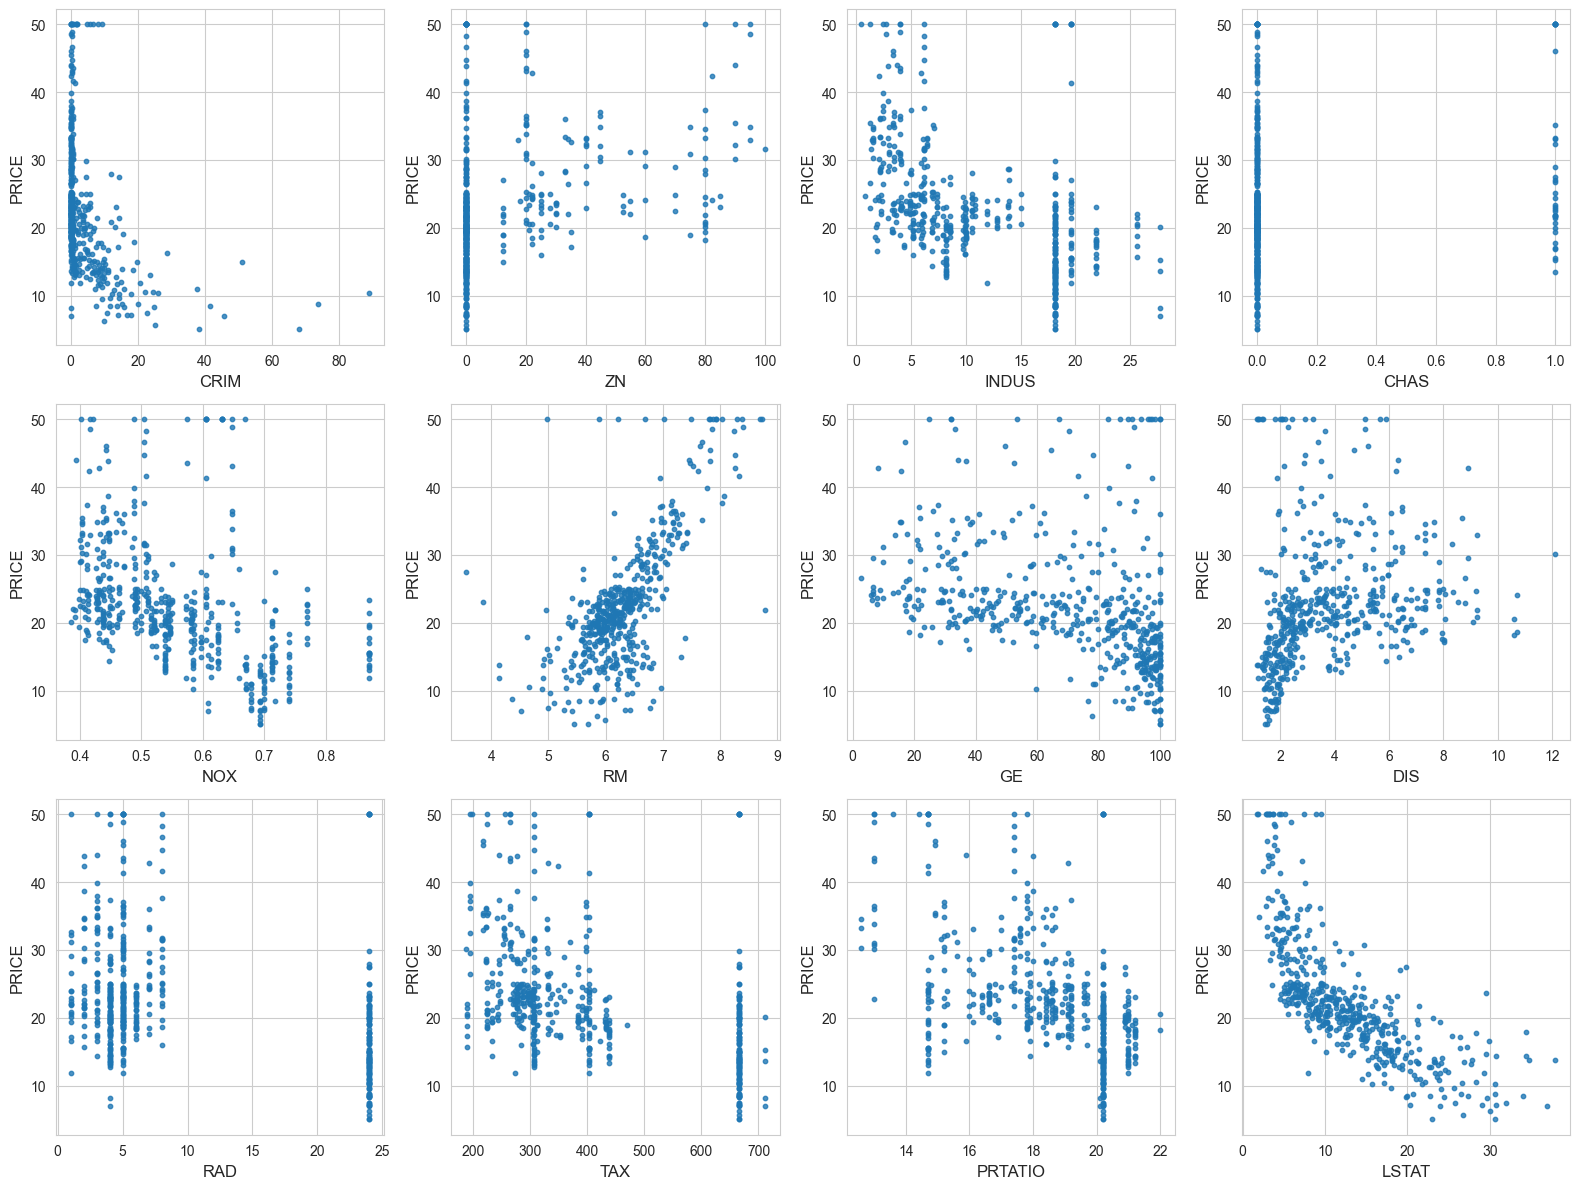

In [44]:
x_data = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'GE', 'DIS', 'RAD', 'TAX', 'PRTATIO', 'LSTAT']]
y_data = boston['PRICE']
column_names = x_data.columns


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12), sharey=True)

for ax, feature in zip(axes.flat, column_names):
    ax.scatter(x_data[feature], y_data, alpha=0.8, s=10)  # s=10 is the size of the dots
    ax.set_xlabel(feature, fontsize=12)  
    ax.set_ylabel("PRICE", fontsize=12) 
    ax.yaxis.set_tick_params(labelleft=True)

plt.tight_layout()
plt.show()


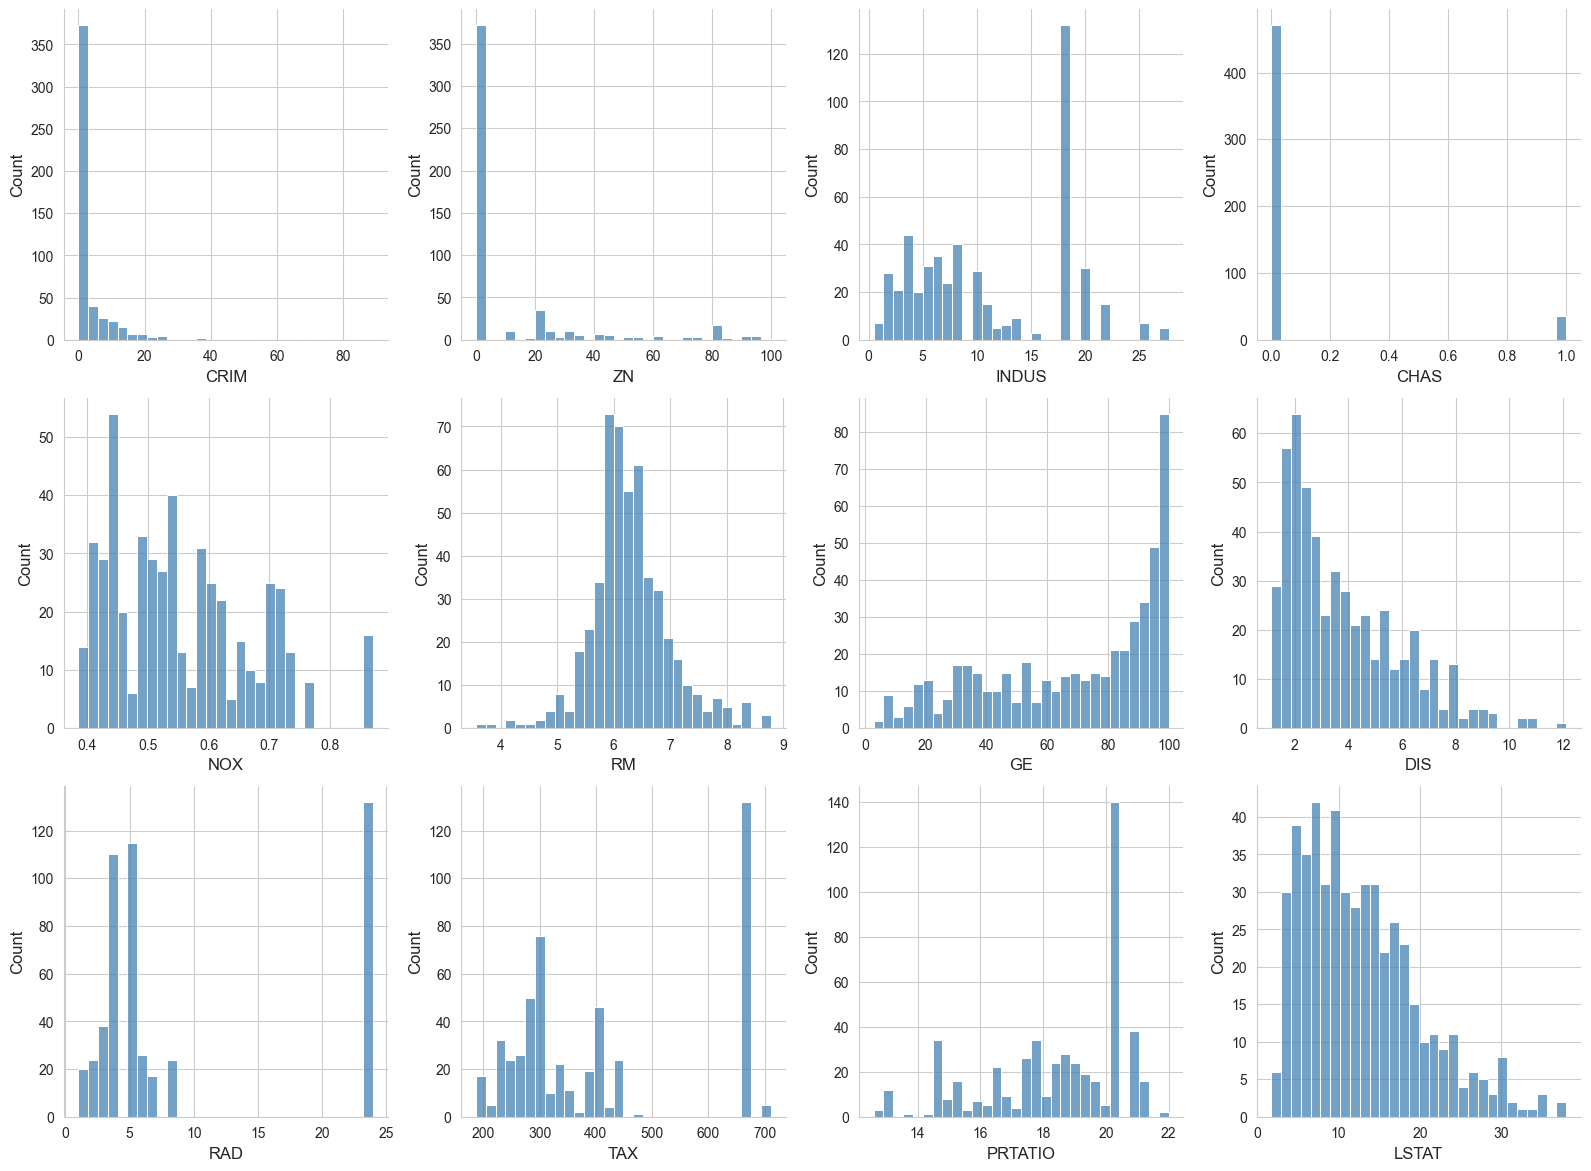

In [43]:
sns.set_style("whitegrid")
column_names = x_data.columns
data_melted = x_data.melt(var_name='Feature', value_name='Value')

g = sns.FacetGrid(data_melted, col="Feature", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "Value", bins=30, kde=False, color="steelblue")  # kde=False is to remove the density curve
g.set_axis_labels("Value", "Count")

for ax in g.axes.flat:
    ax.set_ylabel("Count", fontsize=12)  
    ax.set_title("") 

for ax, feature in zip(g.axes.flat, column_names):
    ax.set_xlabel(feature, fontsize=12)  

plt.show()

Skewness of target: PRICE    1.108098
dtype: float64

kurtosis of target: PRICE    1.495197
dtype: float64


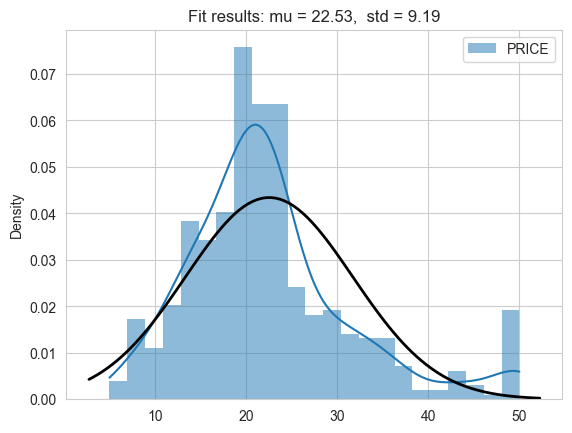

In [15]:
print('Skewness of target:', y_data.skew())
print()
print('kurtosis of target:', y_data.kurtosis())

sns.histplot(y_data, kde=True, stat="density", linewidth=0)

# Add a normal distribution curve
mu, std = norm.fit(y_data['PRICE'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Fit results: mu = %.2f,  std = %.2f' % (mu, std))
plt.show()

### Split data into train and test group with random seed ###

In [11]:
# data split into training, validation, test with 353:51:102 (7:1:2)
random_seed= 24

# First, split the data into train+val and test sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=random_seed)
# Then, split the train+val set into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.125, random_state=random_seed)

In [15]:
#The train and test index after spliting the original
y_train_index= y_train.index
y_val_index= y_val.index                   
y_test_index= y_test.index
print(len(y_train_index), len(y_val_index), len(y_test_index))

with open("bosten_data_split.pickle", "wb") as f:
    pickle.dump([y_train_index, y_val_index,y_test_index], f)
#print(y_test_index)

353 51 102
Index([368, 105, 269, 119, 351, 189, 172, 136,  32,   3,
       ...
       126,  44, 179, 202, 505, 100,  82, 226, 416,  84],
      dtype='int64', length=102)


In [22]:
# with open("data_outliers.pickle", "wb") as f:
#     pickle.dump([y_train_outliers_index, y_val_outliers_index, y_test_outliers_index], f)